In [1]:
import numpy as np

import pandas as pd

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
with open('titanic.csv') as f:
    df = pd.read_csv(f, dtype={'age': np.float64, 'sibsp': np.int64, 'parch': np.int64})

In [3]:
df.head(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


Text(0.5, 1.0, 'Male')

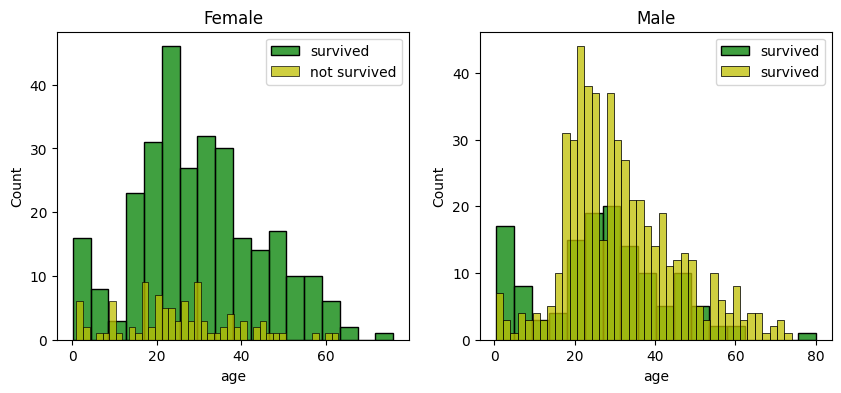

In [7]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

women = df[df['sex']=='female']
men = df[df['sex']=='male']

ax = sns.histplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color='g')
ax = sns.histplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color='y')
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax=axes[1], kde=False, color='g')
ax = sns.histplot(men[men['survived']==0].age.dropna(), bins=40, label = survived, ax=axes[1], kde=False, color='y')
ax.legend()
ax.set_title('Male')



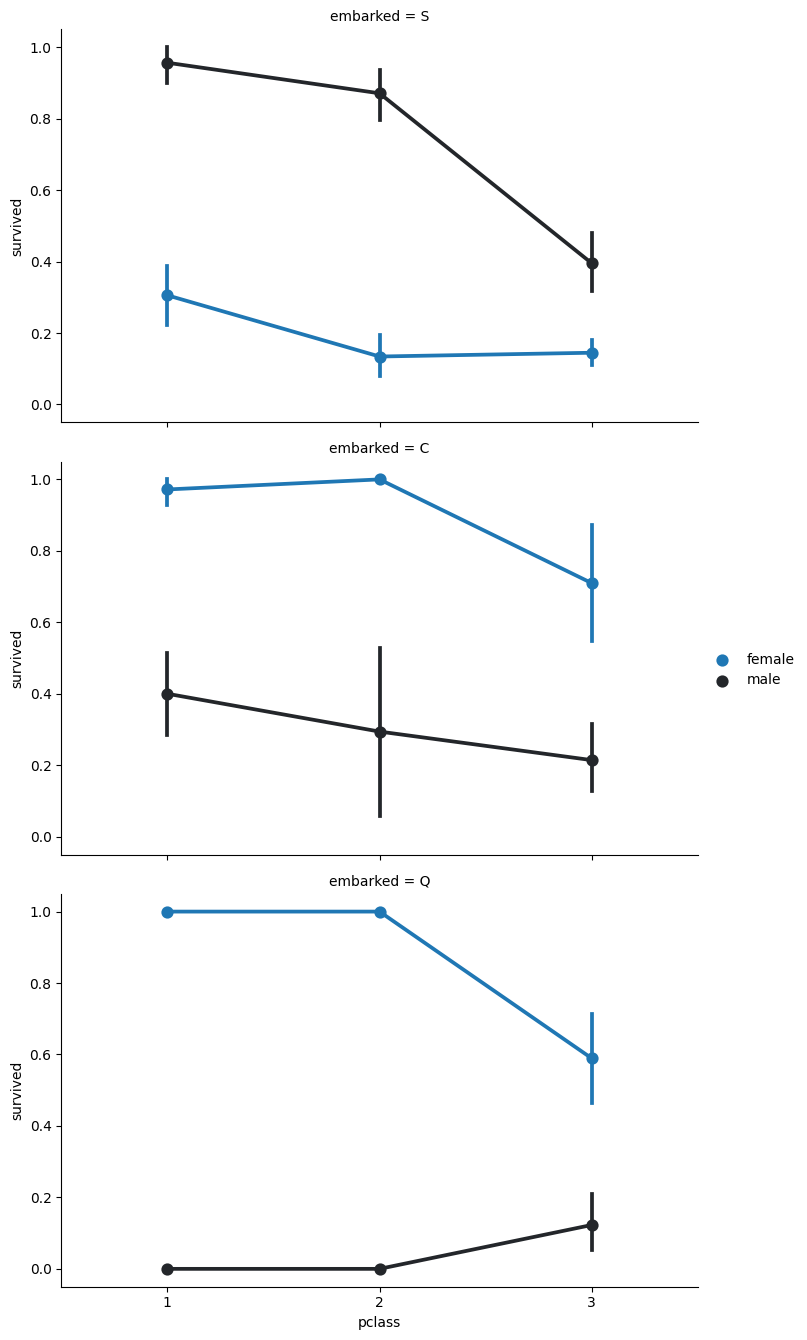

In [8]:
FacetGrid = sns.FacetGrid(df, row='embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<Axes: xlabel='pclass', ylabel='survived'>

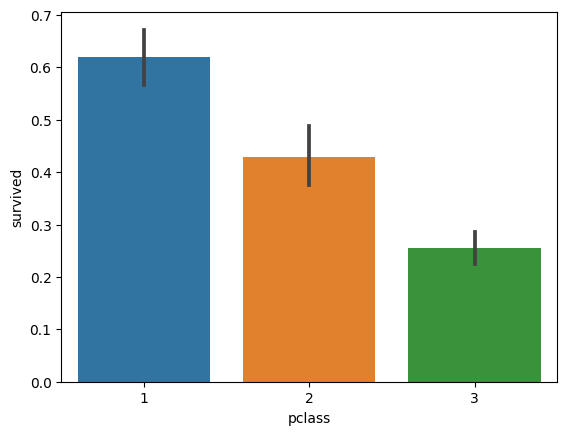

In [9]:
sns.barplot(x='pclass', y='survived', data=df)

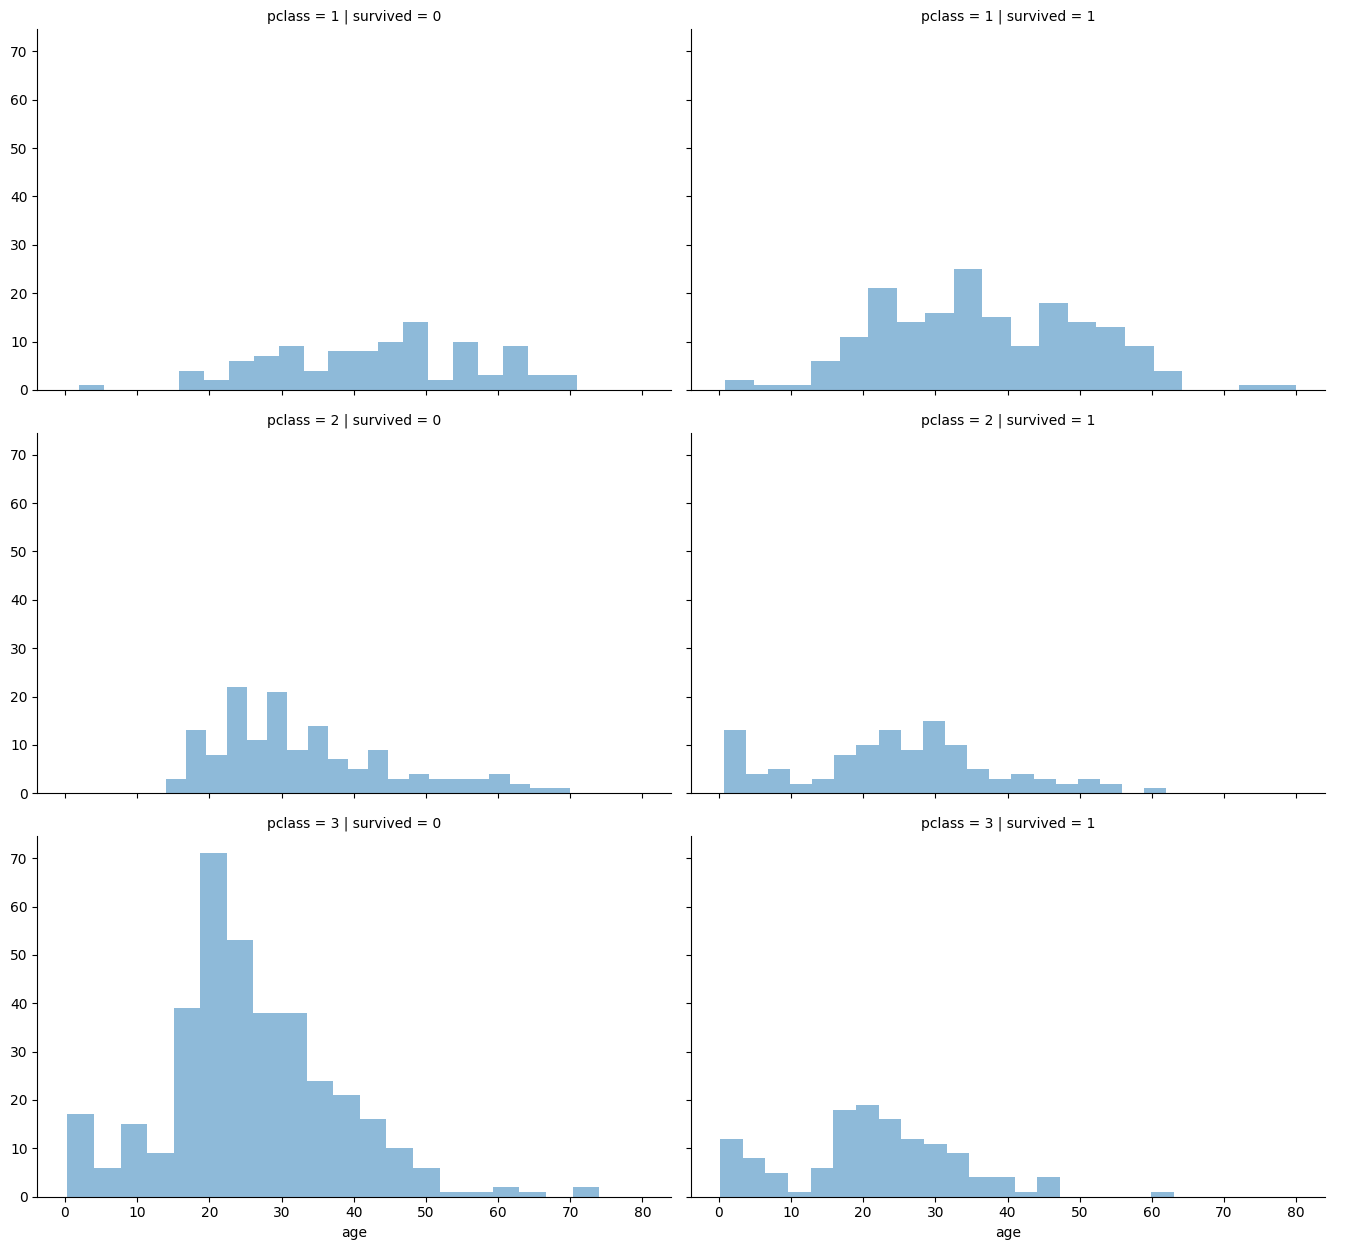

In [10]:
grid = sns.FacetGrid(df, col='survived', row='pclass', height=4.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [11]:
for dataset in [df]:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

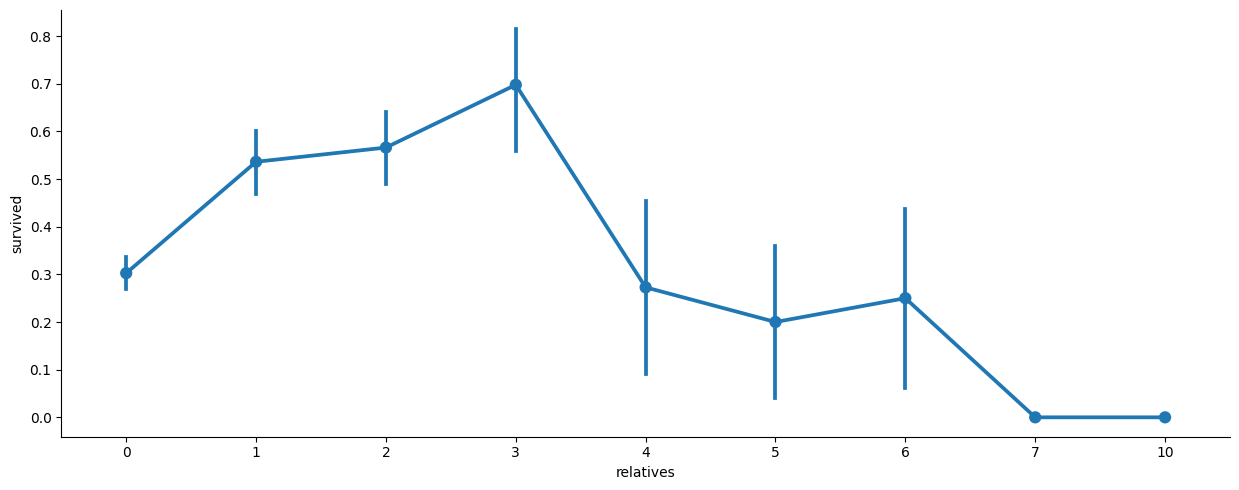

In [12]:
axes = sns.catplot(x='relatives', y='survived', data=df, aspect=2.5, kind='point',)

In [13]:
import re

In [14]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in [df]:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)
df = df.drop(['cabin'], axis=1)

In [15]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [16]:
df = df.drop(['ticket'], axis=1)
df = df.drop(['boat'], axis=1)
df = df.drop(['body'], axis=1)
df = df.drop(['home.dest'], axis=1)

In [17]:
for dataset in [df]:
    mean = df["age"].mean()
    std = df["age"].std()
    is_null = dataset["age"].isnull().sum()
    #compute random numbers between the mean, std, and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #fill NaN values in Age column with random values generated
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = df["age"].astype(int)
df["age"].isnull().sum()

0

In [18]:
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [19]:
common_value = 'S'

for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int32  
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   fare       1308 non-null   float64
 8   embarked   1309 non-null   object 
 9   relatives  1309 non-null   int64  
 10  not_alone  1309 non-null   int32  
 11  deck       1309 non-null   int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 107.5+ KB


In [21]:
for dataset in [df]:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [22]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in [df]:
    #extrat titles
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    #replace titles with a more common title or as Rare
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', \
                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    #convert titles into numbers
    dataset['title'] = dataset['title'].map(titles)
    #filling NaN with 0, to get safe
    dataset['title'] = dataset['title'].fillna(0)
df = df.drop(['name'], axis=1)    

In [23]:
genders = {"male": 0, "female": 1}

for dataset in [df]:
    dataset['sex'] = dataset['sex'].map(genders)

In [24]:
ports = {"S": 0, "C": 1, "Q": 2}
    
for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [25]:
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[dataset['age'] > 66, 'age'] = 7

In [26]:
df['age'].value_counts()

6    237
4    236
3    217
5    207
2    170
1    142
0     91
7      9
Name: age, dtype: int64

In [27]:
for dataset in [df]:
    dataset.loc[dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare'] = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare'] = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare'] = 4
    dataset.loc[dataset['fare'] > 250, 'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

In [28]:
for dataset in [df]:
    dataset['age_class'] = dataset['age'] + dataset['pclass']

In [29]:
for dataset in [df]:
    dataset['fare_per_person'] = dataset['fare'] / (dataset['relatives'] + 1)
    dataset['fare_per_person'] = dataset['fare_per_person'].astype(int)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title,age_class,fare_per_person
0,1,1,1,4,0,0,4,0,0,1,2,2,5,4
1,1,1,0,0,1,2,4,0,3,0,3,4,1,1
2,1,0,1,0,1,2,4,0,3,0,3,2,1,1
3,1,0,0,4,1,2,4,0,3,0,3,1,5,1
4,1,0,1,3,1,2,4,0,3,0,3,3,4,1
5,1,1,0,6,0,0,2,0,0,1,5,1,7,2
6,1,1,1,6,1,0,3,0,1,0,4,2,7,1
7,1,0,0,5,0,0,0,0,0,1,1,1,6,0
8,1,1,1,6,2,0,3,0,2,0,3,3,7,1
9,1,0,0,7,0,0,3,1,0,1,8,1,8,3
